Lecture 3
===========================================================================

Convexity and Hessians
------------

In [1]:
from __future__ import division
from __future__ import print_function

In [2]:
import sympy
sympy.init_printing()

Let's find the derivatives of a few functions

In [17]:
x = sympy.Symbol('x', real=True)
functions = (('a', 3*x**2),
             ('b', 2*x),
             ('c', -5*x**2),
             ('d', 2*x**2 - x**3))
for (c, f) in functions:
    derivative = sympy.diff(f, x, 2)
    positivex = sympy.solve(derivative>0, x)
    print(c, str(derivative), positivex)

a 6 True
b 0 False
c -10 False
d 2*(-3*x + 2) And(-oo < x, x < 2/3)


We can also evaluate symbolic expressions of multiple variables

In [13]:
x1, x2 = sympy.symbols('x1 x2')
f = x1**2  + x2**2
f

For example f(1,2)

In [48]:
f.subs({x1: x + 2, x2: 2})

List comprehensions
================

The following pattern is very common in code, where we start with an empty list and append to it by processing another list.

In [49]:
v = []
for i in [2, 1, 3, 4]:
    if i > 2:
        v.append(i**2)
v

In fact, it is so common that there is a shorthand in Python which does exactly that called a _list comprehension_

In [50]:
[i**2 for i in [2, 1, 3, 4] if i > 2]

This gives us an easy way to substitute the solution of our previous set of equtions into each equation:

In [51]:
[eq.subs(ans) for eq in eqs]

And take the partial derivative w.r.t. each variable

In [14]:
variables = [x1, x2]
df = [f.diff(variable, 1) for variable in variables]
df

### Gradients

We can use this to build a function to calculate the gradient vector:

In [15]:
f.subs({x1: x + 2, x2: 2})

NameError: name 'x' is not defined

In [16]:
def gradient(f, variables):
    return sympy.Matrix([f.diff(variable) for variable in variables])

We can also calculate the gradient using the `.jacobian` method on matrix objects. Notice that it doesn't return a column vector by default, so we have to transpose.

In [17]:
def gradient2(f, variable):
    return sympy.Matrix([f]).jacobian(variables).T

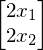

In [18]:
df = gradient(f, variables)
df

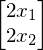

In [19]:
gradient2(f, variables)

### Second order derivative

In [20]:
df2 = [f.diff(variable, 2) for variable in variables]
df2

Partial derivative w.r.t. one variable then the next

In [21]:
dfx1x2 = [df[i].diff(variable) for i, variable in enumerate(reversed(variables))]
dfx1x2

Remember the Hessian is the matrix of repeated partial differentials:

$$\begin{bmatrix} \frac{\partial^2 f}{\partial x_{1}^2} & \frac{\partial^2 f}{\partial x_{1} \partial x_{2}} \\ \frac{\partial^2 f}{\partial x_{2} \partial x_{1}} & \frac{\partial^2 f}{\partial x_{2}^2} \end{bmatrix}$$

Luckily, sympy supplies a function to calculate the Hessian

In [22]:
F = sympy.Function('F')

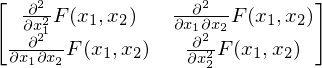

In [23]:
sympy.hessian(F(x1, x2), variables)

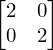

In [24]:
H = sympy.hessian(f, variables)
H

We can still evaluate these expressions at a specific point

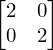

In [25]:
H.subs({x1: 1, x2: 2})

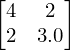

In [26]:
f2 = 2*x1**2 + 2*x1*x2 + 1.5*x2**2 + 7*x1 + 8*x2 + 24
H2 = sympy.hessian(f2, [x1, x2])
H2

## Positive definite matrices

Positive definiteness is the matrix analogue to positiveness in scalars. Observe these definitions:

$x^THx \geq 0 \forall x \iff H~\text{positive semidefinite}$ similar to $h \geq 0 \iff h~\text{positive}$

$x^THx > 0 \forall x \neq 0 \iff H~\text{positive definite}$ similar to $h > 0 \iff h~\text{strictly positive}$

$x^THx < 0 \forall x \neq 0 \iff H~\text{negative definite}$ similar to $h < 0 \iff h~\text{strictly negative}$

$x^THx \leq 0 \forall x \iff H~\text{positive semidefinite}$ similar to $h \leq 0 \iff h~\text{negative}$

There are several ways to determine whether a matrix is positive definite.

The first involves evaluating the leading principal minors. The minors are the determinants of matrices obtained by removing a certain number of rows and columns. If the rows and columns which are removed have the same indices, the minor is called a principal minor. If the rows and columns removed are also from the beginning to some point $i$, it is known as a leading minor.

In [122]:
def leading_minors(A):
    rows, cols = A.shape
    return [A[:n+1, :n+1].det() for n in range(rows)]

In [123]:
leading_minors(H2)

In [124]:
H2.berkowitz_minors()

In [125]:
def posdef_minor(A):
    return all(m >= 0 for m in leading_minors(A))

In [126]:
posdef_minor(H2)

True

The second method is to check if all the eigenvalues are positive

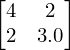

In [127]:
H2

In [128]:
EV = H2.eigenvals()
EVs = [sympy.N(i,3) for i in EV]
EVs

In [129]:
def posdef_eigen(A):
    return all(EV >= 0 for EV in A.eigenvals())

In [130]:
posdef_eigen(H2)

True

So what's the difference between these methods? They will all work, but some take longer than others.

In [131]:
size = 20

In [132]:
%%timeit
H2 = sympy.randMatrix(size)
posdef_minor(H2)

1 loop, best of 3: 951 ms per loop


In [133]:
%%timeit
H2 = sympy.randMatrix(size)
posdef_eigen(H2)

1 loop, best of 3: 438 ms per loop
